# 2 Exploring Relationships

## This script contains the following:
## 1 - Importing libraries and Cleaned Data
## 2 - Exploring Relationship with Data
### Correlation Matrix
### Correlation heatmap using seaborn
### Pair Plot
### Categorical Plots
## 4- Exporting Data

## 1 - Importing libraries and Cleaned Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
#Importing Data
path = r'/Users/marialuciaguarita/Phyton Careerfoundry Project 2'
Data_s = pd.read_csv(os.path.join(path,'Data_s_cleaned'), index_col = False)

## 2 - Exploring Relationships with Data

### Correlation Matrix

In [5]:
#Selecting columns
Data_s_correlation = Data_s[['age', 'hours_of_help', 'n_children', 'time_walk_day', 'household_income', 'salary', 'retirement']]

In [6]:
Data_s_correlation.describe()

,age,hours_of_help,n_children,time_walk_day,household_income,salary,retirement
count,9905.000000,9905.000000,9905.000000,9905.000000,9905.000000,9905.000000,9905.000000
mean,66.647350,70.999899,3.463322,1.162912,2787.594427,1575.016113,1692.623927
std,9.890062,5.620908,2.559837,1.253079,2788.781923,812.677525,1640.432941
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,71.000000,2.000000,1.000000,1400.000000,1574.700000,998.000000
50%,65.000000,71.000000,3.000000,1.160000,2080.000000,1574.700000,1692.000000
75%,74.000000,71.000000,5.000000,1.160000,3000.000000,1574.700000,1692.000000
max,109.000000,360.000000,20.000000,12.000000,80000.000000,18000.000000,94000.000000


In [7]:
Data_s_correlation.corr()

,age,hours_of_help,n_children,time_walk_day,household_income,salary,retirement
age,1.000000,0.024180,0.245208,-0.012455,-0.017358,-0.038411,-0.018904
hours_of_help,0.024180,1.000000,0.002747,-0.003779,-0.022418,0.001129,-0.013221
n_children,0.245208,0.002747,1.000000,-0.015829,-0.123815,-0.048541,-0.105292
time_walk_day,-0.012455,-0.003779,-0.015829,1.000000,-0.007811,-0.015584,0.002360
household_income,-0.017358,-0.022418,-0.123815,-0.007811,1.000000,0.321249,0.458407
salary,-0.038411,0.001129,-0.048541,-0.015584,0.321249,1.000000,0.072353
retirement,-0.018904,-0.013221,-0.105292,0.002360,0.458407,0.072353,1.000000


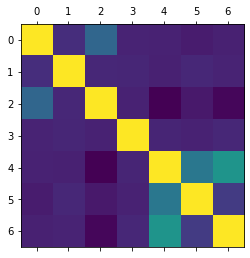

In [8]:
plt.matshow(Data_s_correlation.corr())
plt.show()

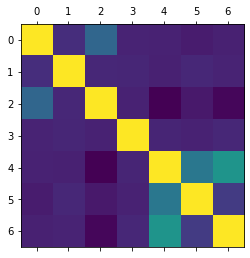

In [9]:
# Save figure
plt.matshow(Data_s_correlation.corr())
plt.savefig("out.png") 

In [10]:
#current dir
cwd = os.getcwd()
cwd

'/Users/marialuciaguarita/Phyton Careerfoundry Project 2'

Text(0.5, 1.0, 'Correlation Matrix')

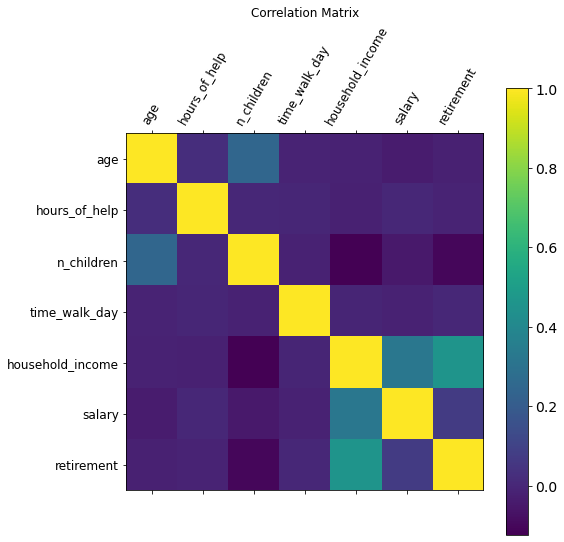

In [11]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(Data_s_correlation.corr(), fignum=f.number) # type of plot
plt.xticks(range(Data_s_correlation.shape[1]), Data_s_correlation.columns, fontsize=12, rotation=60) # x axis labels
plt.yticks(range(Data_s_correlation.shape[1]), Data_s_correlation.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

For such analysis, in order to make the evaluation viable, the quantitative data of the sample were chosen, despite not being the most connected to the questions asked, but serving to describe the population studied
It is observed significantly positive relationship between the characteristics, and they correlate with greater meaning and "retirement" with "household_icnome". What was expected given that both the salary and the retirement amount are part of the sum total of the amount received by the employees of a house
Another existing correlation is between the number of children and the age of the participants. It confirms that the more the years go by, Brazilians also had fewer children.
There was no correlation between the time of external assistance (hours_of_help) among the participants and the number of children
There was a negative correlation in relation to the number of children and the income of the house or value of the retirement received

### Trying a new correlation with just the disabled people

In [12]:
#Selecting people with walking impariment 
Data_s_disabled = Data_s.copy()
Data_s_disabled.drop(Data_s_disabled.index[Data_s_disabled['diffic_walk']==1],inplace=True)

In [13]:
Data_s_disabled

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id2,region,area,age,adapt_bath,adapt_room,...,hours_of_help,n_children,device_for_the_test,bedridden,diffic_run,diffic_walk,diffic_walk_oneblock,diffic_climbing,time_walk_day,household_income
0,0,0,0,0,20200001,1,1,60,8,8,...,71,4.0,0,3,1,0,0,1,3.0,4000.0
1,1,1,1,1,20200002,1,1,62,8,8,...,71,4.0,0,3,1,0,0,0,3.0,3800.0
3,3,3,3,3,20200004,1,1,78,8,8,...,71,6.0,0,3,1,0,0,9,2.0,2000.0
4,4,4,4,4,20200005,1,1,89,8,8,...,71,10.0,0,3,0,0,1,1,1.0,2000.0
5,5,5,5,5,20200006,1,1,89,8,8,...,71,3.0,0,3,0,0,0,0,2.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,9897,9897,9897,9940,20209941,5,1,75,8,8,...,71,5.0,1,3,1,0,0,1,9.0,998.0
9900,9900,9900,9900,9943,20209944,5,1,57,8,8,...,71,5.0,0,3,0,0,0,0,0.0,2800.0
9901,9901,9901,9901,9944,20209945,5,1,53,8,8,...,71,2.0,0,3,1,0,0,1,2.0,1250.0
9902,9902,9902,9902,9945,20209946,5,1,54,8,8,...,71,1.0,0,3,1,0,0,0,0.0,5000.0


In [14]:
Data_s_correlation_disabled = Data_s_disabled[['age', 'hours_of_help', 'n_children', 'time_walk_day', 'household_income', 'salary', 'retirement']]

In [15]:
Data_s_correlation_disabled.corr()

,age,hours_of_help,n_children,time_walk_day,household_income,salary,retirement
age,1.000000,-0.021970,0.210100,0.004208,-0.003877,-0.059602,0.013617
hours_of_help,-0.021970,1.000000,0.009090,-0.039760,-0.024584,0.000534,-0.047872
n_children,0.210100,0.009090,1.000000,-0.011968,-0.129102,-0.058825,-0.097495
time_walk_day,0.004208,-0.039760,-0.011968,1.000000,-0.009187,-0.014216,0.002410
household_income,-0.003877,-0.024584,-0.129102,-0.009187,1.000000,0.351881,0.460323
salary,-0.059602,0.000534,-0.058825,-0.014216,0.351881,1.000000,0.069183
retirement,0.013617,-0.047872,-0.097495,0.002410,0.460323,0.069183,1.000000


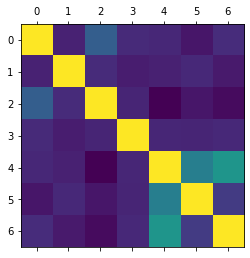

In [16]:
plt.matshow(Data_s_correlation_disabled.corr())
plt.show()

In [17]:
# It is noted that there was no change in the correlations when trying to select only people with disabilities to walk.

### Correlation heatmap using seaborn

In [18]:
# Create a subset selecting the "household_income', "retirement" and "salary" 
sub = Data_s_correlation [['household_income', 'retirement', 'salary']]

In [19]:
sub

,household_income,retirement,salary
0,4000.0,1692,1000.0
1,3800.0,1692,3800.0
2,2000.0,1692,1574.7
3,2000.0,1692,1500.0
4,2000.0,2000,1574.7
...,...,...,...
9900,2800.0,1692,1500.0
9901,1250.0,1692,350.0
9902,5000.0,1692,3800.0
9903,2787.1,998,1574.7


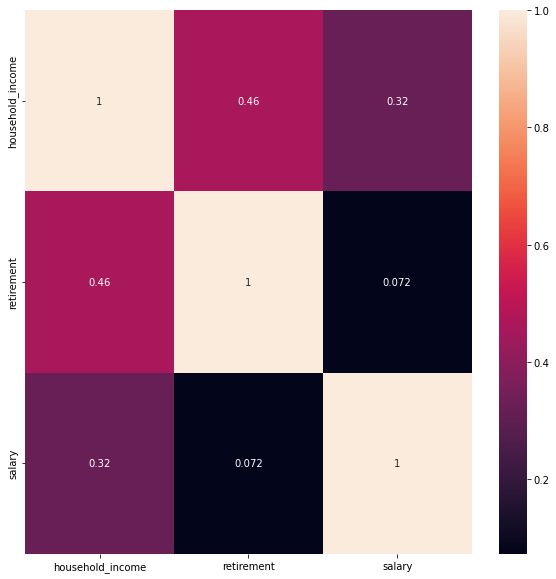

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Pair Plot 

In [21]:
# Keep only the variables you want to use in the pair plot

sub_2 = Data_s_correlation[['age', 'hours_of_help', 'n_children', 'time_walk_day', 'household_income', 'salary', 'retirement']]

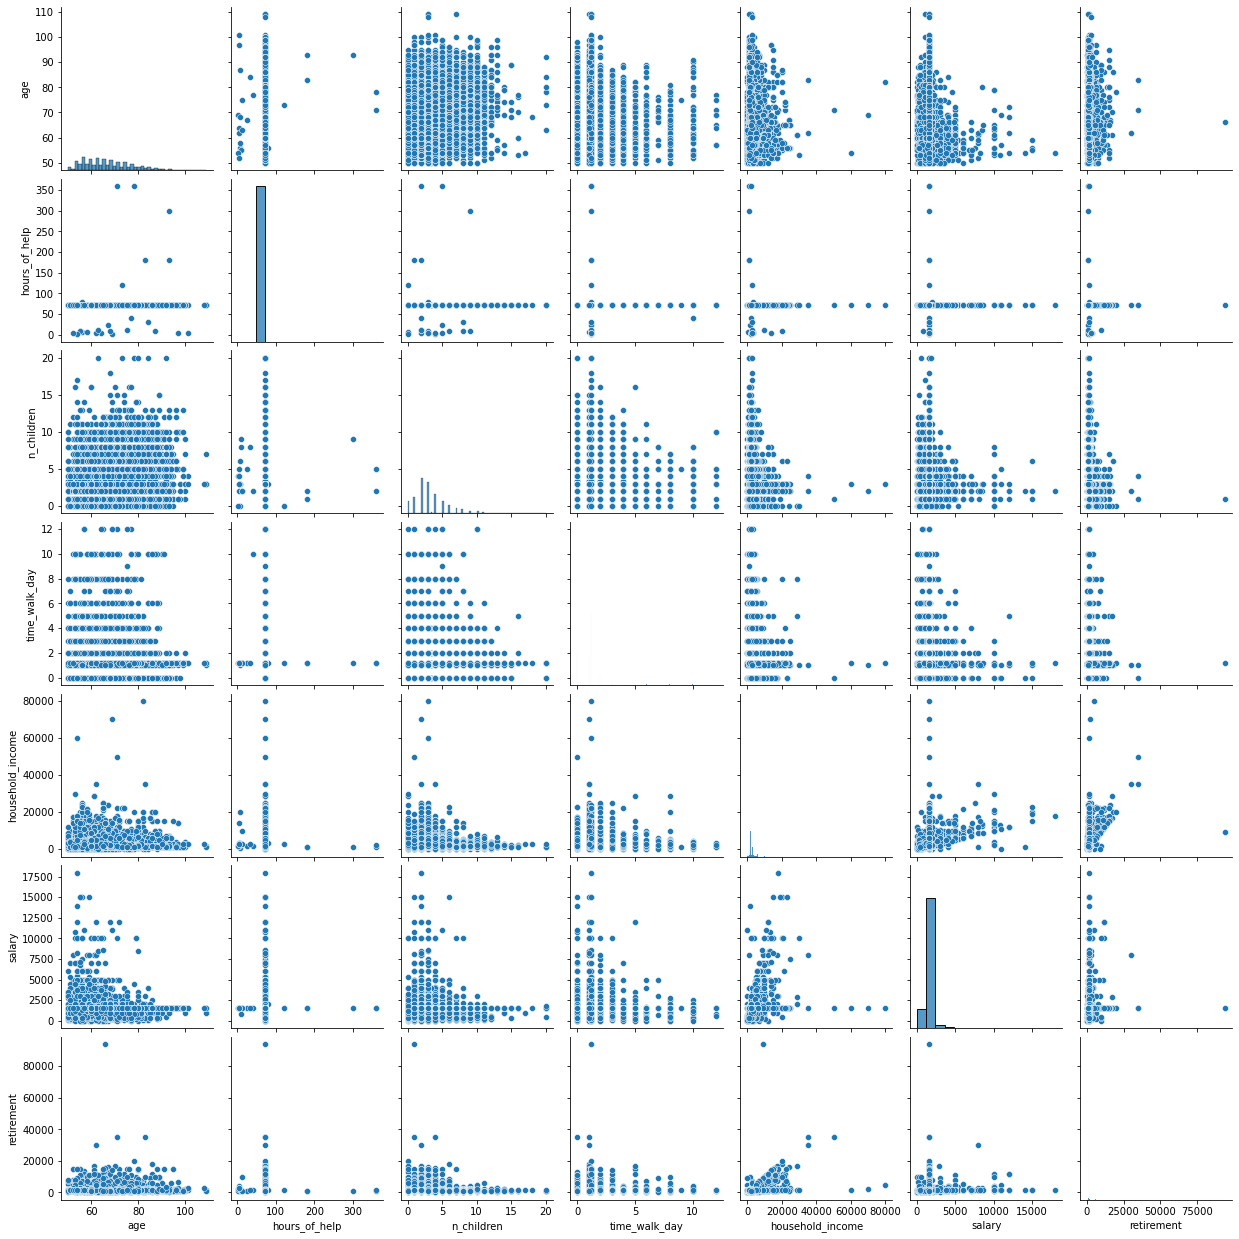

In [22]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Categorical Plots:

<AxesSubplot:xlabel='age', ylabel='Count'>

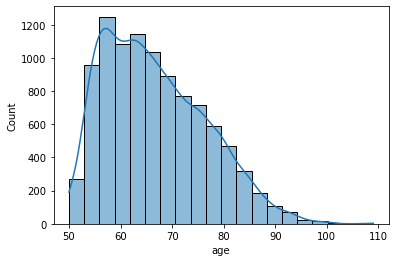

In [23]:
sns.histplot(Data_s_correlation['age'], bins = 20, kde = True)

In [24]:
Data_s_correlation.dtypes

age                   int64
hours_of_help         int64
n_children          float64
time_walk_day       float64
household_income    float64
salary              float64
retirement            int64
dtype: object

In [25]:
Data_s_correlation.loc[Data_s_correlation['age'] <60, 'age_classification'] = 'youngest_old'

/var/folders/k5/m6vpm9n1053cccch_hbzdwbm0000gn/T/ipykernel_16999/2936133679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_s_correlation.loc[Data_s_correlation['age'] <60, 'age_classification'] = 'youngest_old'


In [26]:
Data_s_correlation.loc[(Data_s_correlation['age'] >=60) & (Data_s_correlation['age'] <70), 'age_classification'] = 'middle-age'

In [27]:
Data_s_correlation.loc[Data_s_correlation['age'] >=70, 'age_classification'] = 'oldest_old'

In [28]:
Data_s_correlation['age_classification'].value_counts(dropna = False)

middle-age      3539
oldest_old      3533
youngest_old    2833
Name: age_classification, dtype: int64

In [29]:
Data_s_correlation.columns

Index(['age', 'hours_of_help', 'n_children', 'time_walk_day',
       'household_income', 'salary', 'retirement', 'age_classification'],
      dtype='object')

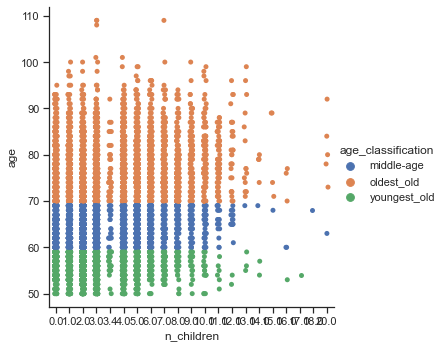

In [30]:
# Create a categorical plot in seaborn using the age categories created above
sns.set(style="ticks")
g = sns.catplot(x="n_children", y="age", hue="age_classification", data=Data_s_correlation)

As observed, the number of children from 03 onwards, occurs more in people over 70 years old.

# Questions

In [31]:
#Regarding the questions of the work, I believe that the focus will be more on the characterization of the sample como abaixo.
Data_s_correlation.describe()

,age,hours_of_help,n_children,time_walk_day,household_income,salary,retirement
count,9905.000000,9905.000000,9905.000000,9905.000000,9905.000000,9905.000000,9905.000000
mean,66.647350,70.999899,3.463322,1.162912,2787.594427,1575.016113,1692.623927
std,9.890062,5.620908,2.559837,1.253079,2788.781923,812.677525,1640.432941
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,71.000000,2.000000,1.000000,1400.000000,1574.700000,998.000000
50%,65.000000,71.000000,3.000000,1.160000,2080.000000,1574.700000,1692.000000
75%,74.000000,71.000000,5.000000,1.160000,3000.000000,1574.700000,1692.000000
max,109.000000,360.000000,20.000000,12.000000,80000.000000,18000.000000,94000.000000


In [32]:
#Categorização dos pacientes em faixas etárias e suas respectivas quantidades e talvez pela faixa de renda (household_income)
Data_s_correlation['age_classification'].value_counts(dropna = False)

middle-age      3539
oldest_old      3533
youngest_old    2833
Name: age_classification, dtype: int64

<AxesSubplot:xlabel='household_income', ylabel='Count'>

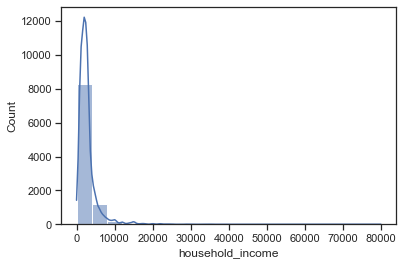

In [33]:
#Categorization by household_income
sns.histplot(Data_s_correlation['household_income'], bins = 20, kde = True)

In [34]:
Data_s_correlation.loc[Data_s_correlation['household_income'] <2424, 'income_classification'] = 'low_income'

/var/folders/k5/m6vpm9n1053cccch_hbzdwbm0000gn/T/ipykernel_16999/1988059236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_s_correlation.loc[Data_s_correlation['household_income'] <2424, 'income_classification'] = 'low_income'


In [40]:
Data_s_correlation.loc[(Data_s_correlation['household_income'] >=2424) & (Data_s_correlation['household_income'] <7812), 'income_classification'] = 'middle_income'



In [41]:
Data_s_correlation.loc[Data_s_correlation['household_income'] >=7812, 'income_classification'] = 'high_income'

In [42]:
Data_s_correlation['income_classification'].value_counts(dropna = False)

low_income       5399
middle_income    4126
high_income       380
Name: income_classification, dtype: int64

# 4- Exporting Data

In [43]:
#Exporting checked data from Data_s
Data_s.to_csv(os.path.join(path,'Data_s_cleaned'))

In [44]:
Data_s.shape

(9905, 38)